In [1]:
import IPython
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from scipy.ndimage import binary_erosion
import seaborn as sns

sns.set_theme()

In [2]:
# Load data

mask = binary_erosion(
    nib.load("2-shell_HARDI_preprocessed/brain_mask.nii.gz").get_fdata().astype(bool),
    iterations=2,
)  # to exlude voxels outside the brain
lambda_cyl = nib.load("smt_diff.nii.gz").get_fdata()[mask]
lambda_cyl *= 1e3  # change of units
v_cyl = nib.load("smt_intra.nii.gz").get_fdata()[mask]
idx = (v_cyl >= 0) & (v_cyl <= 1) & (lambda_cyl >= 0) & (lambda_cyl <= 3)
v_cyl = v_cyl[idx]
lambda_cyl = lambda_cyl[idx]

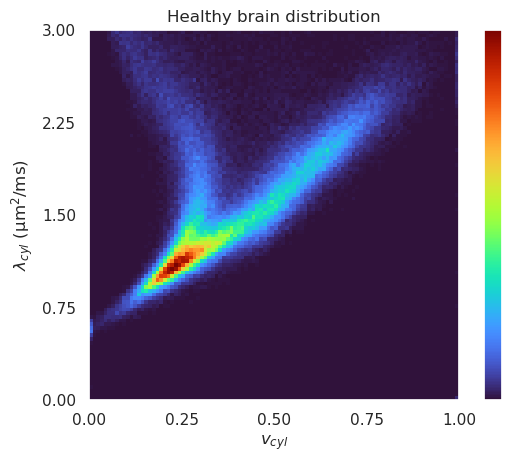

In [3]:
# Show the parameter distribution in a healthy brain

x = v_cyl
y = lambda_cyl

n_bins = 100
hist, x_edges, y_edges = np.histogram2d(x, y, bins=[n_bins, n_bins])
hist /= hist.sum()  # normalize

fig, ax = plt.subplots()
extent = [x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]]
im = ax.imshow(hist.T, extent=extent, origin="lower", cmap="turbo", aspect=1 / 3)
cbar = plt.colorbar(im)
cbar.set_ticks([])
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks(np.linspace(0, 3, 5))
ax.set_xlabel(r"$v_{cyl}$")
ax.set_ylabel(r"$\lambda_{cyl}$ (μm$^2$/ms)")
ax.grid(False)
plt.title("parameter distribution in a healthy brain")
plt.show()